<a href="https://colab.research.google.com/github/tchappui/heia-cours-technique-de-reaction/blob/master/Chapitre6/CTR02_Exercice6.9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

A = CH3COCH3, B = CH2CO et C = CH4

$$A \to B+C$$

**Erreur dans le diamètre**: pas 40inch de diamètre mais 1.050 inch = 0.0266 m

In [0]:
DeltaCp = -9 # J/mol/K
DeltaHR298 = 80770 # J/mol
a = 4 / 0.0266 # 1/m
U = 110 # J/m2/s/K
Ua = U * a # J/m3/s/K
FA0 = 7850 / 58 * 1/1000 # mol/s
cpA = 163 # J/mol/K
cpc = 34.5 # J/mol/K
CA0 = 162 / 8.314 / 1035 * 1000 # mol/m3
Vdot = FA0 / CA0 # L/s
V = 0.001 # m3/tube
mcdot = 0.111 # mol/s
T0 = 1035 # K
Tj0 = 1250 # K
alpha = 1

In [0]:
def deltaH(T):
    return DeltaHR298 + DeltaCp * (T - 298)

In [0]:
def k(T):
    return np.exp(34.34 - 34222/T)

**Cas adiabatique**

In [0]:
def bilans_ad(variables, V):
    FA, FB, FC, T = variables
    
    X = 1 - FA/FA0
    
    CA = CA0 * (1 - X)
    CB = CA0 * X
    
    r1 = k(T) * CA0 * (1-X) * (T0/T) * 1/(1 + alpha * X)
    
    RA = -r1
    RB = r1
    RC = r1
    
    dFA = RA
    dFB = RB
    dFC = RC
    dT = (-deltaH(T)) * r1 / FA0 / cpA
    
    return [dFA, dFB, dFC, dT]

In [0]:
conditions_initiales_ad = [FA0, 0, 0, T0]
Vad = np.arange(0, 0.001001, 0.000001)

In [0]:
resultats = odeint(
    bilans_ad,
    conditions_initiales_ad,
    Vad
)

In [0]:
FA = resultats[:,0]
FB = resultats[:,1]
FC = resultats[:,2]
T = resultats[:,3]

X = 1 - FA/FA0


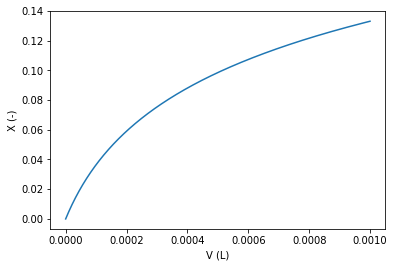

In [9]:
plt.plot(Vad, X)
plt.xlabel('V (L)')
plt.ylabel('X (-)')
plt.show()

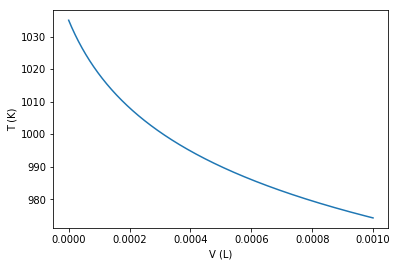

In [10]:
plt.plot(Vad, T)
plt.xlabel('V (L)')
plt.ylabel('T (K)')
plt.show()

**Cas Tj constant**

In [0]:
def bilans_tjconst(variables, V):
    FA, FB, FC, T = variables
    
    X = 1 - FA/FA0
    
    CA = CA0 * (1 - X)
    CB = CA0 * X
    
    r1 = k(T) * CA0 * (1-X) * (T0/T) * 1/(1 + alpha * X)
    
    RA = -r1
    RB = r1
    RC = r1
    
    dFA = RA
    dFB = RB
    dFC = RC
    dT = (Ua * (Tj0 - T) + (-deltaH(T)) * r1) / FA0 / cpA
    
    return [dFA, dFB, dFC, dT]

In [0]:
conditions_initiales_tjconst = [FA0, 0, 0, T0]
Vtjconst = np.arange(0, 0.001001, 0.000001)

In [0]:
resultats = odeint(
    bilans_tjconst,
    conditions_initiales_tjconst,
    Vtjconst
)

In [0]:
FA = resultats[:,0]
FB = resultats[:,1]
FC = resultats[:,2]
T = resultats[:,3]

X = 1 - FA/FA0

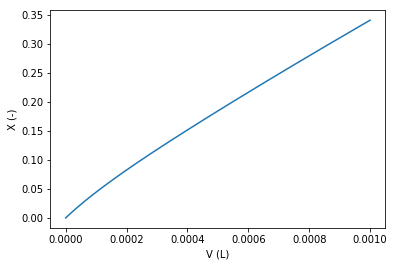

In [15]:
plt.plot(Vtjconst, X)
plt.xlabel('V (L)')
plt.ylabel('X (-)')
plt.show()

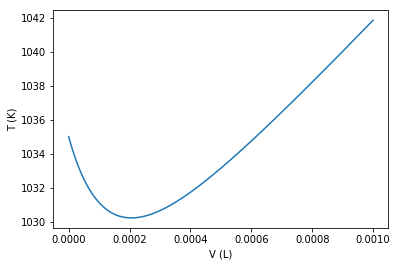

In [16]:
plt.plot(Vtjconst, T)
plt.xlabel('V (L)')
plt.ylabel('T (K)')
plt.show()

**Cas co-courant**

In [0]:
def bilans_tjco(variables, V):
    FA, FB, FC, T, Tj = variables
    
    X = 1 - FA/FA0
    
    CA = CA0 * (1 - X)
    CB = CA0 * X
    
    r1 = k(T) * CA0 * (1-X) * (T0/T) * 1/(1 + alpha * X)
    
    RA = -r1
    RB = r1
    RC = r1
    
    dFA = RA
    dFB = RB
    dFC = RC
    dT = (Ua * (Tj - T) + (-deltaH(T)) * r1) / FA0 / cpA
    dTj = Ua * (T - Tj) / mcdot / cpc
    
    return [dFA, dFB, dFC, dT, dTj]

In [0]:
conditions_initiales_tjco = [FA0, 0, 0, T0, Tj0]
Vtjco = np.arange(0, 0.001001, 0.000001)

In [0]:
resultats = odeint(
    bilans_tjco,
    conditions_initiales_tjco,
    Vtjco
)

In [0]:
FA = resultats[:,0]
FB = resultats[:,1]
FC = resultats[:,2]
T = resultats[:,3]

X = 1 - FA/FA0

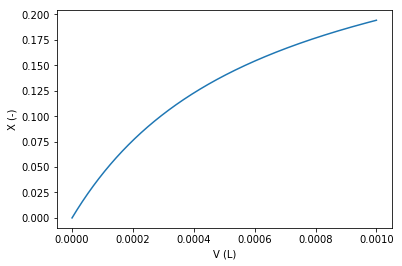

In [21]:
plt.plot(Vtjco, X)
plt.xlabel('V (L)')
plt.ylabel('X (-)')
plt.show()

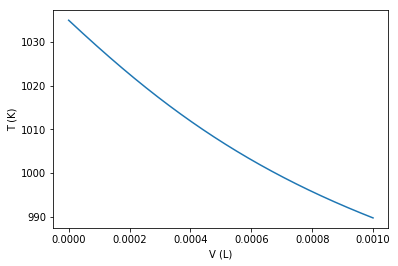

In [22]:
plt.plot(Vtjco, T)
plt.xlabel('V (L)')
plt.ylabel('T (K)')
plt.show()

**Cas contre courant**

In [0]:
def bilans_tjcounter(variables, V):
    FA, FB, FC, T, Tj = variables
    
    X = 1 - FA/FA0
    
    CA = CA0 * (1 - X)
    CB = CA0 * X
    
    r1 = k(T) * CA0 * (1-X) * (T0/T) * 1/(1 + alpha * X)
    
    RA = -r1
    RB = r1
    RC = r1
    
    dFA = RA
    dFB = RB
    dFC = RC
    dT = (Ua * (Tj - T) + (-deltaH(T)) * r1) / FA0 / cpA
    dTj = Ua * (Tj - T) / mcdot / cpc
    
    return [dFA, dFB, dFC, dT, dTj]

A vous de jouer pour l'itération